In [232]:
import numpy as np
import pandas as pd

import requests
import matplotlib.pyplot as plt


In [234]:
# r = requests.get('http://data.thecrix.de/data/crix11.json').json()
VCRIX = pd.DataFrame(r)
VCRIX.date = pd.to_datetime(VCRIX.date)

# VCRIX.n = VCRIX.n.astype(np.int)

_id = VCRIX.date > '20180614'

VCRIX = VCRIX.loc[_id, :]

VCRIX.n = list(range(len(VCRIX)))

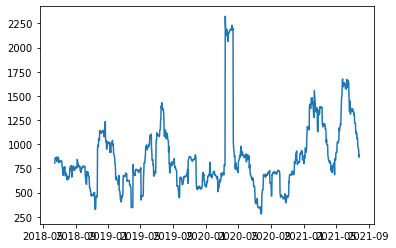

In [242]:
plt.plot(VCRIX.date, VCRIX.vcrix)


# thres = np.quantile(VCRIX.vcrix , 0.90)


thres = 1000
i = VCRIX.vcrix >=thres
# plt.scatter(VCRIX.date.loc[i], VCRIX.vcrix.loc[i], color='red')

stress_period = VCRIX.loc[i, :]

# for i in range(len(stress_period)-1):
#     start = training_Clayton.Date.iloc[i]
#     end =  training_Clayton.Date.iloc[i+1]
#     _end = end
#     plt.axvspan(start, end,facecolor='black', alpha=.2)

In [257]:
stress_period.date

1459   2018-11-26
1460   2018-11-27
1461   2018-11-28
1462   2018-11-29
1463   2018-11-30
1464   2018-12-01
1465   2018-12-02
1466   2018-12-03
1467   2018-12-04
1468   2018-12-05
1469   2018-12-06
1470   2018-12-07
1471   2018-12-08
1472   2018-12-09
1473   2018-12-10
1474   2018-12-11
1475   2018-12-12
1476   2018-12-13
1477   2018-12-14
1478   2018-12-15
1479   2018-12-16
1480   2018-12-17
1481   2018-12-18
1482   2018-12-19
1483   2018-12-20
1484   2018-12-21
1485   2018-12-22
1486   2018-12-23
1487   2018-12-24
1488   2018-12-25
1492   2018-12-29
1493   2018-12-30
1494   2018-12-31
1495   2019-01-01
1496   2019-01-02
1497   2019-01-03
1498   2019-01-04
1499   2019-01-05
1506   2019-01-12
1507   2019-01-13
1508   2019-01-14
1509   2019-01-15
1510   2019-01-16
1511   2019-01-17
1514   2019-01-20
1648   2019-06-03
1650   2019-06-05
1651   2019-06-06
1652   2019-06-07
1653   2019-06-08
1654   2019-06-09
1655   2019-06-10
1656   2019-06-11
1675   2019-06-30
1676   2019-07-01
1677   201

In [243]:
last_n = stress_period.iloc[0,:].n

start_arr = [stress_period.iloc[0,:].date]
end_arr = []

for row_i in range(1, len(stress_period)-2):
    
    last_n = stress_period.iloc[row_i-1,:].n
    n  = stress_period.iloc[row_i,:].n
    next_n = stress_period.iloc[row_i+1,:].n
    next_next_n = stress_period.iloc[row_i+2,:].n

    
    if (next_n-n>1):
        end_arr.append(stress_period.iloc[row_i,:].date)

    if n-last_n>1:
        start_arr.append(stress_period.iloc[row_i,:].date)

        
end_arr.append(stress_period.iloc[-1,:].date)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


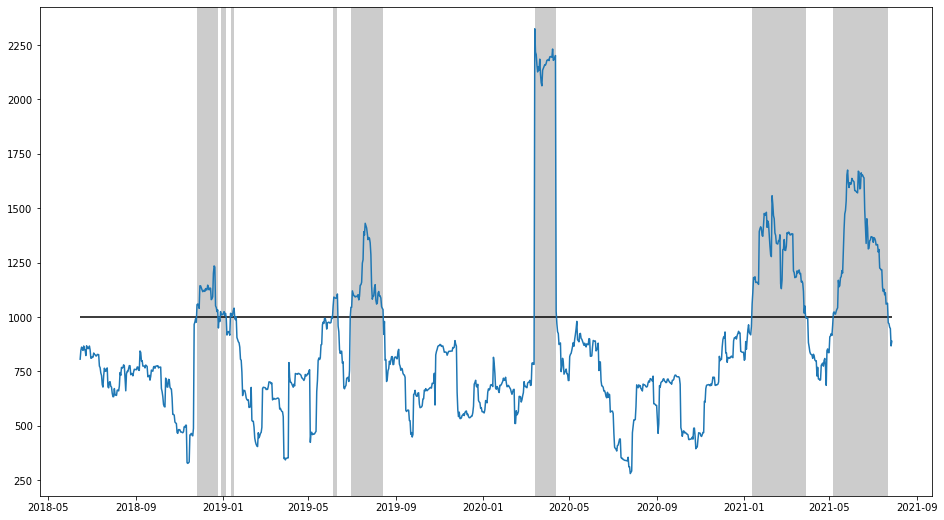

In [244]:
plt.figure(figsize=(16,9))
plt.plot(VCRIX.date, VCRIX.vcrix)

plt.hlines(y=thres, xmin=VCRIX.iloc[0,:].date, xmax=VCRIX.iloc[-1,:].date)


# plt.plot(stress_period.date, stress_period.vcrix)
for i in range(len(start_arr)):
    start = start_arr[i]
    end =  end_arr[i]
    plt.axvspan(start, end, facecolor='black', alpha=.2)

In [245]:
np.array(end_arr)  - np.array(start_arr) 

array([Timedelta('29 days 00:00:00'), Timedelta('7 days 00:00:00'),
       Timedelta('5 days 00:00:00'), Timedelta('0 days 00:00:00'),
       Timedelta('0 days 00:00:00'), Timedelta('6 days 00:00:00'),
       Timedelta('45 days 00:00:00'), Timedelta('30 days 00:00:00'),
       Timedelta('75 days 00:00:00'), Timedelta('76 days 00:00:00')],
      dtype=object)

In [247]:
for i in range(len(start_arr)):
    print(start_arr[i], end_arr[i])

2018-11-26 00:00:00 2018-12-25 00:00:00
2018-12-29 00:00:00 2019-01-05 00:00:00
2019-01-12 00:00:00 2019-01-17 00:00:00
2019-01-20 00:00:00 2019-01-20 00:00:00
2019-06-03 00:00:00 2019-06-03 00:00:00
2019-06-05 00:00:00 2019-06-11 00:00:00
2019-06-30 00:00:00 2019-08-14 00:00:00
2020-03-14 00:00:00 2020-04-13 00:00:00
2021-01-13 00:00:00 2021-03-29 00:00:00
2021-05-07 00:00:00 2021-07-22 00:00:00


In [299]:
rh_df = pd.read_csv('../../results/%s/MM/rh_%s_copula_selection.csv'%('BBT_future_CRIX', 'VaR q=0.05'))

In [300]:
rh_df.Date = pd.to_datetime(rh_df.Date.apply(lambda x: x[:10]))

In [301]:
s_id = rh_df.Date.apply(lambda x: x in list(stress_period.date))

In [302]:
rh_df.loc[:, 'new_h'] = rh_df.loc[:,'h']
rh_df.loc[~s_id, 'new_h'] = 0

In [303]:
rh_df.loc[:, 'new_rh'] = rh_df.rs - rh_df.new_h * rh_df.rf

In [304]:
rh_df

,Unnamed: 0,Date,rh,rs,rf,h,copula,new_h,new_rh
0,0,2021-05-27,-0.000564,0.005573,0.006583,0.932227,t_Copula,0.932227,-0.000564
1,1,2021-05-26,0.023582,0.054012,0.032643,0.932227,t_Copula,0.932227,0.023582
2,2,2021-05-25,0.000400,-0.057626,-0.062245,0.932227,t_Copula,0.932227,0.000400
3,3,2021-05-24,0.005334,0.093271,0.094330,0.932227,t_Copula,0.932227,0.005334
4,4,2021-05-21,-0.029742,-0.131176,-0.108809,0.932227,t_Copula,0.932227,-0.029742
5,0,2021-05-20,0.013032,0.033315,0.021291,0.952637,Gauss Mix Indep,0.952637,0.013032
6,1,2021-05-19,-0.071113,-0.157294,-0.090465,0.952637,Gauss Mix Indep,0.952637,-0.071113
7,2,2021-05-18,0.006694,-0.012067,-0.019694,0.952637,Gauss Mix Indep,0.952637,0.006694
8,3,2021-05-17,0.001876,-0.123533,-0.131645,0.952637,Gauss Mix Indep,0.952637,0.001876
9,4,2021-05-14,0.019656,0.054760,0.036850,0.952637,Gauss Mix Indep,0.952637,0.019656


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-pack

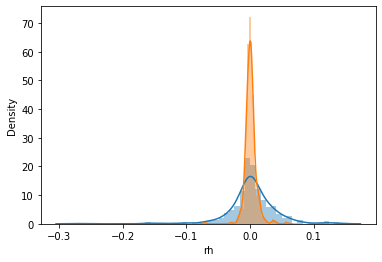

In [305]:
import seaborn as sns
sns.distplot(rh_df.new_rh)
sns.distplot(rh_df.rh)

In [306]:
m1 = np.mean(rh_df.rh)
std1 = np.std(rh_df.rh)

m2 = np.mean(rh_df.new_rh)
std2 = np.std(rh_df.new_rh)

print(m1/std1, m2/std2)

0.09922040669329084 0.07759086101542642
